# BE 485/585: Lab 4
### Danielle Tadych

#### Exercise 1:
In this exercise you will learn to:
* a) read BSQ file
* b) display images
    * Single band gray scale
    * Single band other colors
    * True color composite
    * False color composite

In [3]:
# You should by now be familiar with this 

# load necessary library modules 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

#Here we check to see if our library is where it could be accessed
if "../Library/" not in sys.path:
    sys.path.append("../Library/")
import viplab_lib as vip

# Need to change the directory path  
sys.path.append(r"../Lab_4")

## Load a custom module that reads BSQ data 

In [4]:
# This is a costum module/function that reads BSQ Data
def BSQ_band_read(filename,bandindex,nrows,ncols,datatype=np.int16):
    
    #do image computations
    bytesize=np.dtype(datatype).itemsize
    pixelsperband=nrows*ncols
    bandsize=pixelsperband*bytesize
    
    if type(bandindex) in (list, np.ndarray):
        isList=True
    else:
      isList=False  
      if (bandindex<0):
          isList=True
          bandindex=np.abs(bandindex)  
          bandindex=np.linspace(0,bandindex-1,num=bandindex)
          print(bandindex)
          
    
    #open the file for reading as binary
    f=open(filename,'rb') 
    
    if(isList==True):
      # Several bands will be read
      nbands= len(bandindex)
      print("nbands=",nbands)    
      data=np.zeros((nrows,ncols,nbands),datatype)
      for i in range(0,nbands):
         f.seek(bandsize*i) 
         band=np.fromfile(f,dtype=datatype, count=pixelsperband)
         data[:,:,i]=band.reshape([nrows,ncols])
              
    else:    
       #Read a single band  
       #jum to start of band
       f.seek(bandsize*bandindex)
        
       #read from file as int16, pixels for second band and assign to bandGREEN
       data=np.fromfile(f,dtype=datatype, count=pixelsperband)
       data=data.reshape([nrows,ncols])
    
    # close the file
    f.close()
    return data

# ends bsq reader function    

## Load the data then display images

In [6]:
# figure size is optional but helps create larger/smaller looks

# Load the image - this is not the actual data but a uiqck image thumnail
img_A = mpimg.imread('GreenValley.jpg')
img_B = mpimg.imread('HarvardForest.jpg')

#Here is a different way to create canvas and resize 
rcParams['figure.figsize'] = 11 ,8



# Display images with ticks

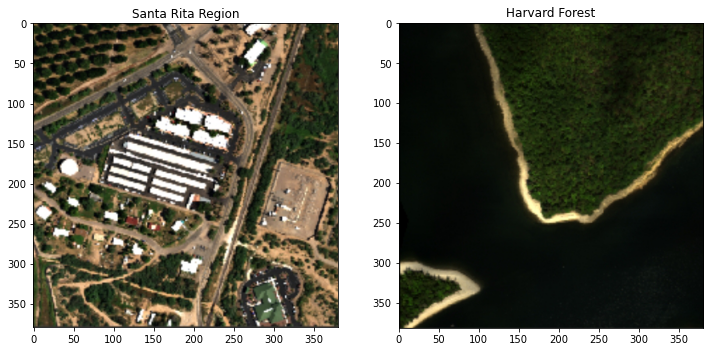

In [7]:
# display images
#Pay attention here, we are creating a canvas with two separate areas to display two images 
# So learn how to create a multi-plot or mulit-image canvas

fig, ax = plt.subplots(1, 2,figsize=(12,12)) # a plot with 2 areas labeled 1 and 2 , indexed below 0 and 1

ax[0].imshow(img_A);
ax[0].title.set_text('Santa Rita Region')

ax[1].imshow(img_B);
ax[1].title.set_text('Harvard Forest')

# Display images without ticks

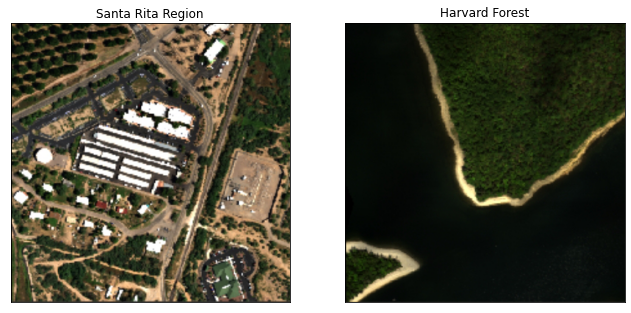

In [8]:
#Here is a different way to create canvas and resize 
rcParams['figure.figsize'] = 11 ,8

# display images
#Pay attention here, we are creating a cnavas with two separate areas to display two images 

fig, ax = plt.subplots(1,2)

ax[0].imshow(img_A);
ax[0].title.set_text('Santa Rita Region')
ax[1].imshow(img_B);
ax[1].title.set_text('Harvard Forest')

# Remove ticks 
ax[0].axes.get_xaxis().set_visible(False) 
ax[0].axes.get_yaxis().set_visible(False) 

ax[1].axes.get_xaxis().set_visible(False) 
ax[1].axes.get_yaxis().set_visible(False) 

# Select and load image data (Green Valley)

In [12]:
# Starts main program
#subset file information - Green Valley Image
filename="NEON_GreenValley.bsq"

In [13]:
#Define image dimentiosn 
nrows=500
ncols=500
datatype=np.int16

In [14]:
# Read a Red band from file. 
# The number 48 correspond to the band position/number [See Lab. lecture]
DataRed=BSQ_band_read(filename,48,nrows,ncols)

# Extract image dimension
Num_Rows, Num_Col= np.shape(DataRed)
print('Image width:  ', Num_Rows)
print('Image height: ', Num_Col)

Image width:   500
Image height:  500


## Display the image 

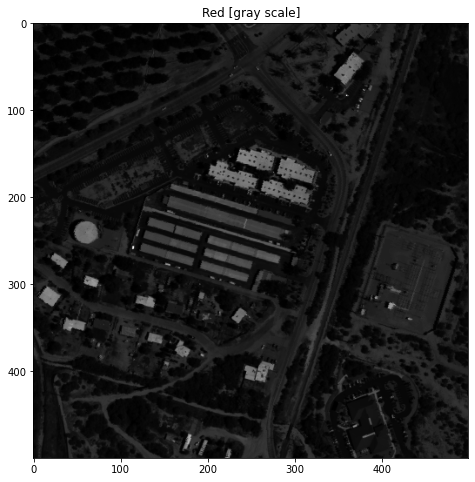

In [15]:
# display band as gray scale
plt.figure()
plt.title('Red [gray scale]')

# you can use the min and max to stretch the image
plt.imshow(DataRed,cmap='gray')

In [16]:
print('Image Max value: ', DataRed.min())
print('Image Min value: ', DataRed.max())


Image Max value:  0
Image Min value:  15307


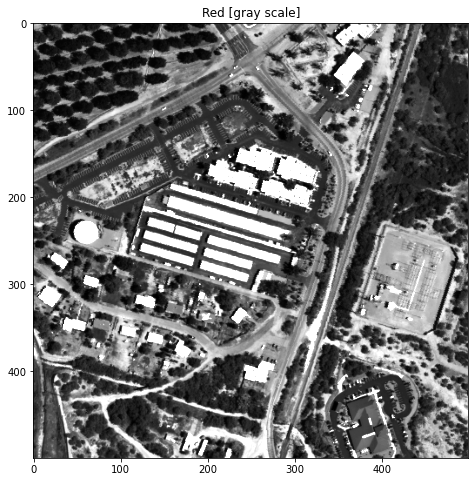

In [17]:
# display band as gray scale
plt.figure()
plt.title('Red [gray scale]')

# you can use the min and max to stretch the image. Compare to the image above 
plt.imshow(DataRed,cmap='gray',vmin=0,vmax=3000)

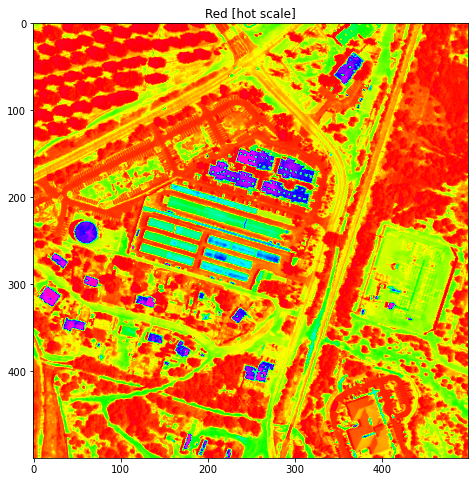

In [18]:
# display band as other color
plt.figure()
plt.title('Red [hot scale]')
plt.imshow(DataRed,cmap='gist_rainbow',vmin=0,vmax=8000)

Creating RGB Image...


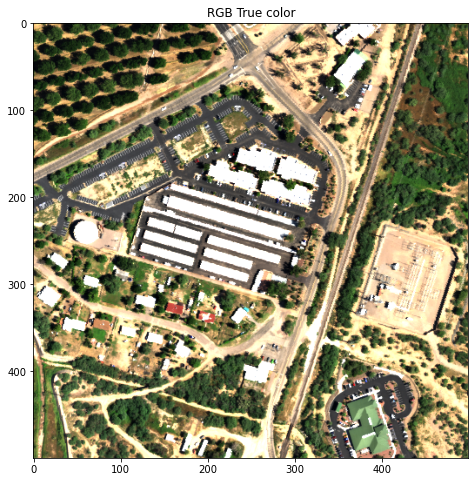

In [19]:
# Read a Green band
DataGreen=BSQ_band_read(filename,34,nrows,ncols)

# Read a Blue band
DataBlue=BSQ_band_read(filename,17,nrows,ncols)

# Combine the Red, Green and Blue data into an RGB model for display
print("Creating RGB Image...")

# The number 6000 corresponnds to the MAX value for the data, so everything will be scaled to MAX from 8000 and up 
RGBImage=vip.Image_getRGB(DataRed,DataGreen,DataBlue,5000)

# Display RGB True color Image
plt.figure()
plt.title('RGB True color')
plt.imshow(RGBImage)

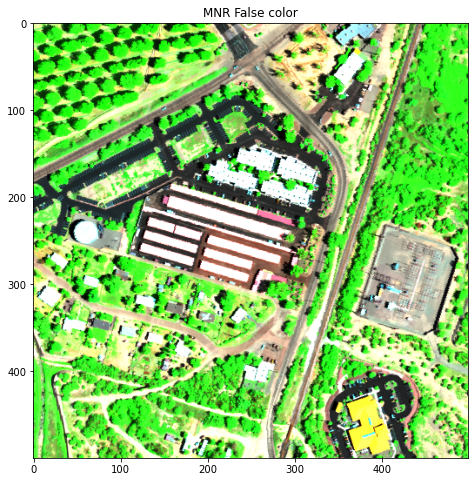

In [20]:
# To remove STARTS
DataMIR=BSQ_band_read(filename,349,nrows,ncols)
DataNIR=BSQ_band_read(filename,95,nrows,ncols)
RGBImage=vip.Image_getRGB(DataMIR,DataNIR,DataRed,8000)
plt.figure()
plt.title('MNR False color')
plt.imshow(RGBImage)
# To remove ENDS

# <font color="red">Homework - To do </font>
## Add/display a color legend next to the images? – Search the web for help
* Try different band combinations and explain what is happening (see  slide in lab instructions)
* Recall how green vegetation reflect in the NIR region, try to assign the NIR to one of the RGB colors (Ex: Red) and see how the image will look like?

In [28]:
# Homework: To do
# Your code here

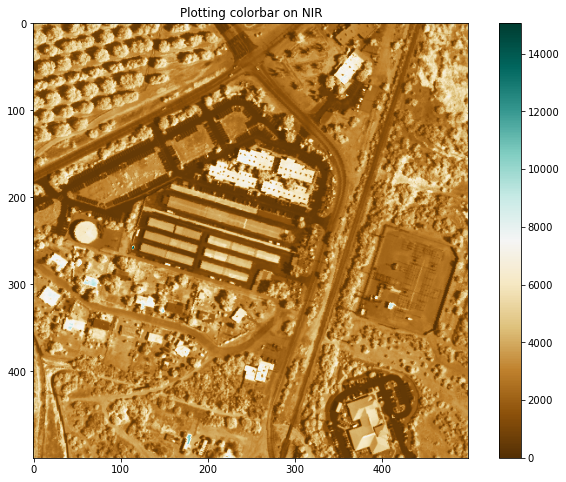

In [38]:
DataNIR=BSQ_band_read(filename,95,nrows,ncols)
# display band as gray scale
plt.figure()
plt.title('Plotting colorbar on NIR')

# you can use the min and max to stretch the image
plt.imshow(DataNIR, cmap = 'BrBG')
plt.colorbar()

In [ ]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(img_A);
ax[0].title.set_text('Santa Rita Region')
ax[1].imshow(img_B);
ax[1].title.set_text('Harvard Forest')

# Remove ticks 
ax[0].axes.get_xaxis().set_visible(False) 
ax[0].axes.get_yaxis().set_visible(False)

Text(0.13, 0.18, 'where vegetation is located.')

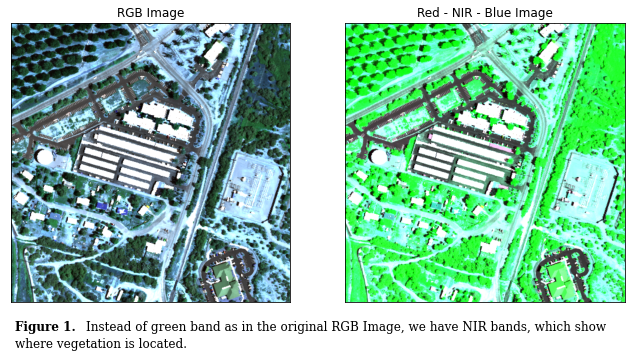

In [76]:
# Now for the actual assignment
DataNIR=BSQ_band_read(filename,95,nrows,ncols)
RNIRBImage=vip.Image_getRGB(DataBlue,DataNIR,DataRed,5000)
RGBImage=vip.Image_getRGB(DataBlue,DataGreen,DataRed,5000)
font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12
        }
font2 = {'family': 'serif',
        'color':  'black',
        'size': 12
        }


# box = {'facecolor': 'none',
#        'edgecolor': 'green',
#        'boxstyle': 'round'
#       }

fig, ax = plt.subplots(1,2)
ax[0].imshow(RGBImage)
ax[0].title.set_text('RGB Image')
ax[0].axes.get_xaxis().set_visible(False) 
ax[0].axes.get_yaxis().set_visible(False)
ax[1].imshow(RNIRBImage)
ax[1].title.set_text('Red - NIR - Blue Image')
ax[1].axes.get_xaxis().set_visible(False) 
ax[1].axes.get_yaxis().set_visible(False)
fig.text(0.13, 0.21, 'Figure 1.', fontdict = font1)
fig.text(0.22, 0.21, 'Instead of green band as in the original RGB Image, we have NIR bands, which show ', fontdict = font2)
fig.text(0.13, 0.18, 'where vegetation is located.', fontdict = font2)

#### Exercise 2:
<ul>In this exercise:<br>
<li>Read a BSQ file, then:</li>
    <ul>
    <li>- Plot Histograms</li>
    <li>- Scatter plots </li>
    <li>- Spectral Signature Plots </li>
</ul>

In [77]:
# load necessary library modules 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

#Here we check to see if our library is where it could be accessed
if "../Library/" not in sys.path:
    sys.path.append("../Library/")
import viplab_lib as vip

In [78]:
# This is a module/function that reads BSQ Data
def BSQ_band_read(filename,bandindex,nrows,ncols,datatype=np.int16):
    
    #do image computations
    bytesize=np.dtype(datatype).itemsize
    pixelsperband=nrows*ncols
    bandsize=pixelsperband*bytesize
    
    if type(bandindex) in (list, np.ndarray):
        isList=True
    else:
      isList=False  
      if (bandindex<0):
          isList=True
          bandindex=np.abs(bandindex)  
          bandindex=np.linspace(0,bandindex-1,num=bandindex)
          print(bandindex)
          
    
    #open the file for reading as binary
    f=open(filename,'rb') 
    
    if(isList==True):
      # Several bands will be read
      nbands= len(bandindex)
      print("nbands=",nbands)    
      data=np.zeros((nrows,ncols,nbands),datatype)
      for i in range(0,nbands):
         f.seek(bandsize*i) 
         band=np.fromfile(f,dtype=datatype, count=pixelsperband)
         data[:,:,i]=band.reshape([nrows,ncols])
              
    else:    
       #Read a single band  
       #jum to start of band
       f.seek(bandsize*bandindex)
        
       #read from file as int16, pixels for second band and assign to bandGREEN
       data=np.fromfile(f,dtype=datatype, count=pixelsperband)
       data=data.reshape([nrows,ncols])
    
    # close the file
    f.close()
    return data

# ends bsq reader function    

# Load the Data

In [81]:
# Main program body

#subset file information
filename=r"NEON_GreenValley.bsq"

# Number of rows 
nrows=500

# Number of columns 
ncols=500

# Data storage type (defines number of bits)
datatype=np.int16

In [82]:
# Read a RED band
DataRed=BSQ_band_read(filename,48,nrows,ncols)
DataGreen=BSQ_band_read(filename,34,nrows,ncols)
DataBlue=BSQ_band_read(filename,17,nrows,ncols)

# Learn to  understand your big data and know its charactristics 

In [83]:
# Extract image dimension
Num_Rows, Num_Col= np.shape(DataRed)
print('Image width:  ', Num_Rows)
print('Image height: ', Num_Col)
print('Image Max Value: ', np.max(DataRed))
print('Image Min Value: ', np.min(DataRed))
print('Image Min Value: ', np.mean(DataRed))  # Notice the value versus Min and MAx

Image width:   500
Image height:  500
Image Max Value:  15307
Image Min Value:  0
Image Min Value:  1392.179816


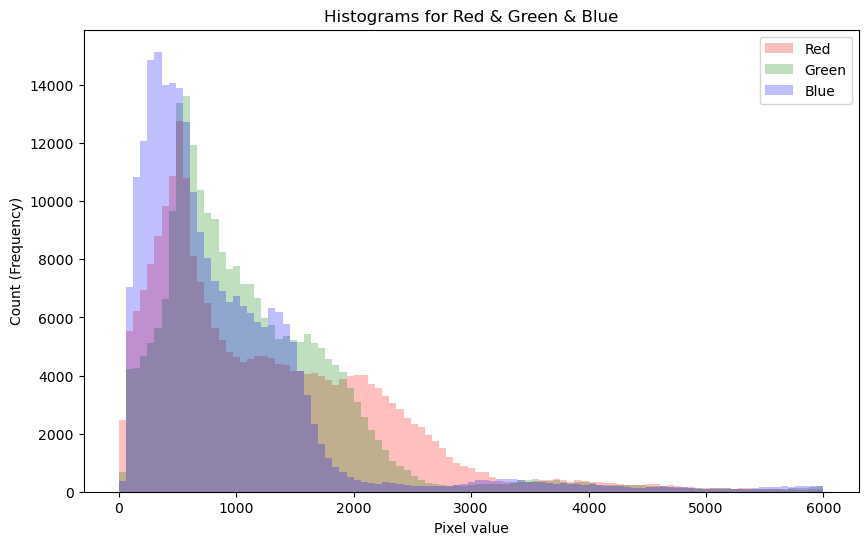

In [84]:
# Create and plot histogram 
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.title('Histograms for Red & Green & Blue')
plt.xlabel('Pixel value')
plt.ylabel('Count (Frequency)')


#Try to understand how we apply color and genrate the historgams. 
# There are other ways to do the same thing
# Histograms are computed based on a bin size (class size) so you can chaneg that
 
bins = np.linspace(0, 6000, 100)  # 100 bins between 0 and 6000 so each is 60 wide

# The ravel() is used to change a 2-dimensional array or a multi-dimensional array into 
# a contiguous flattened 1-D array. The returned array has the same data type as the source array or input array. 

plt.hist(DataRed.ravel(),bins, alpha=0.25, range=(0,6000),color='red',label='Red')
plt.hist(DataGreen.ravel(),bins, alpha=0.25, range=(0,6000),color='green',label='Green')
plt.hist(DataBlue.ravel(),bins, alpha=0.25, range=(0,6000),color='blue',label='Blue')
plt.legend(loc='upper right')
plt.show()

# Now lets plot the correlation between two bands 

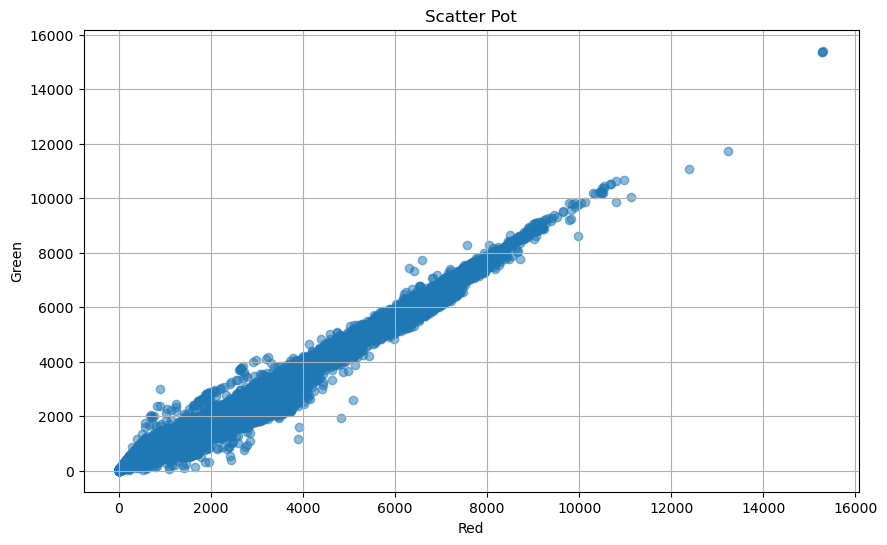

In [85]:
# Create a ScatterPlot between Red and Green bands 
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.title('Scatter Pot')
plt.xlabel('Red')
plt.ylabel('Green')
plt.scatter(DataRed,DataGreen,marker='o',alpha=0.5)
plt.grid()

## <font color="blue"> We will use Machine learning tools here to perform a simple regression analysis 
* This is no different than any other tool for regression analysis. Except to add that Regression is a classical predictive tool </font>
* We will learn how to create a linear regressions with some of the data from these images to learn how they are correlated
* It is up to you to understand the meaning of these correlations

## <font color=red>Import the skleran library linear regression model and import the data </font>

In [86]:
# We now load the linear regression model from the library Sklearn (a machine learning library)

from sklearn import linear_model

################################################ Train-Ordinary Least Square Model  #############################################
ols = linear_model.LinearRegression()

# Before we can use the tool we need to reshape the 2D image into a 1D array to perform the analysis following the classical Y=f(X)
# The reshape call does that by specifying 1 for the 1D and -1 for whatever is needed in terms of the length of the array
X =DataRed[233:].reshape(-1,1)    # Please understand slicing 
y =DataGreen[233:].reshape(-1,1)  # Please understand slicing 

## <font color=red>Train the model and generate it's R2</font>


In [87]:
# Train and generate the model 
model = ols.fit(X,y)
response = model.predict(X)

###################### Evaluate ###############

R2 = model.score(X, y)

###################### Plot ###################

## <font color=red> Plot the data and the model </font>

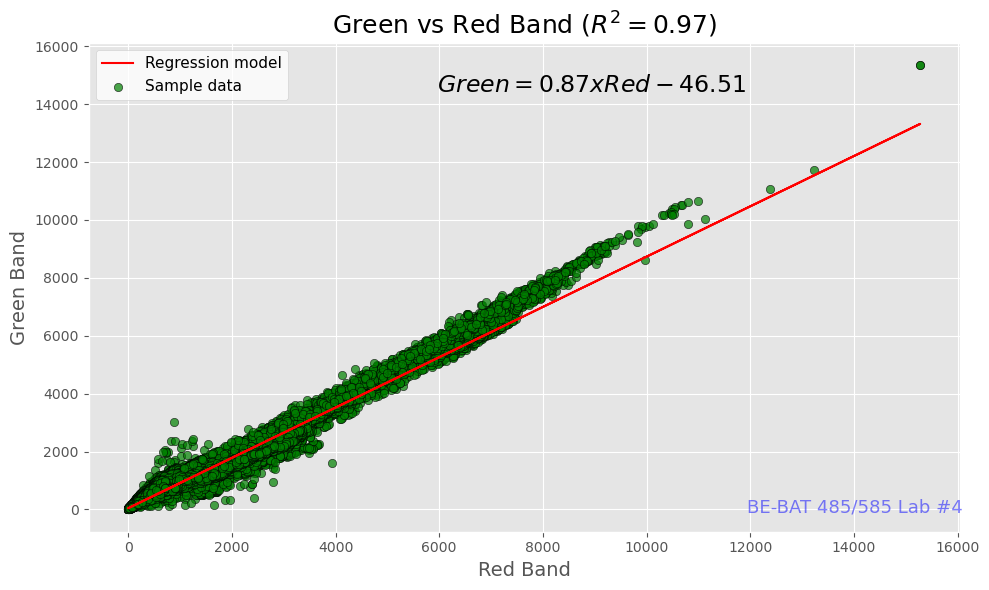

In [88]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 6))

# plot the modled data
ax.plot(X, response, color='r', label='Regression model')

# plot the observations
ax.scatter(X, y, edgecolor='k', facecolor='green', alpha=0.7, label='Sample data')
ax.set_ylabel('Green Band', fontsize=14)
ax.set_xlabel('Red Band', fontsize=14)
# Now add the model to the plot
ax.text(0.4, 0.90, '$Green = %.2f xRed - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)


ax.text(0.88, 0.05, 'BE-BAT 485/585 Lab #4', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='blue', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Green vs Red Band ($R^2= %.2f$)' % R2, fontsize=18)


# This call tighten the plot and removes any padding or space around it. Useful sometimes
fig.tight_layout()

## Now we will learn how to build spectral signatures. i.e. the behavior of an object across the full spectrum 

## First we need to load the bands labels/wavelengthes from amn external text file <font color=red><NEON_wavelength_values.txt></font>
## These labels will be used for labeling so we know which band is which 

In [2]:
# Read the wavelength values from the textfile
file = open(r'NEON_wavelength_values.txt','r') 
Xvalues= file.readlines() 
nvalues=len(Xvalues)
#convert text to number (float)
for i in range(0,nvalues):
  Xvalues[i]=float(Xvalues[i]) 

# close text file
file.close

<function TextIOWrapper.close()>

In [4]:
print(len(Xvalues))

426


## Read all the bands now - Remember this is a hyperspectral data set

In [91]:
DataAll=BSQ_band_read(filename,-426,nrows,ncols)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

## Pick few pixels/objects and plot their respective spectral signatures 

### Notice how we pick the pixels/objects using Python array Slicing 
### Also notice that we fix the <font color=blue> ROW and COLUMN </font>which define the location and let the bands be free [:] so as to get the spectra

In [92]:
# Define the location and extract their signatures 
Yvalues_Tree=DataAll[35,78,:]

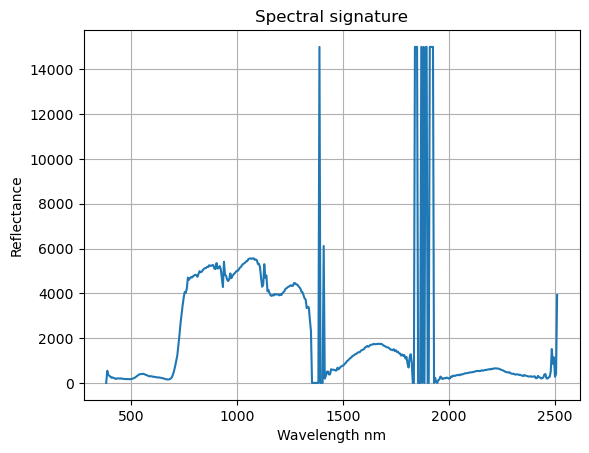

In [93]:
plt.style.use('default')
plt.figure()
plt.title('Spectral signature')
plt.xlabel('Wavelength nm')
plt.ylabel('Reflectance')
plt.plot(Xvalues,Yvalues_Tree)
plt.grid(True)
plt.show()

# <font color="red">Homework - To do </font>
* What information you think the plot is capturing? Explain? <br>
~ It is capturing the wavelengths and reflectance from a specific tree, which means we can look at a graph of wavelength versus reflectance and identify which spots are trees.

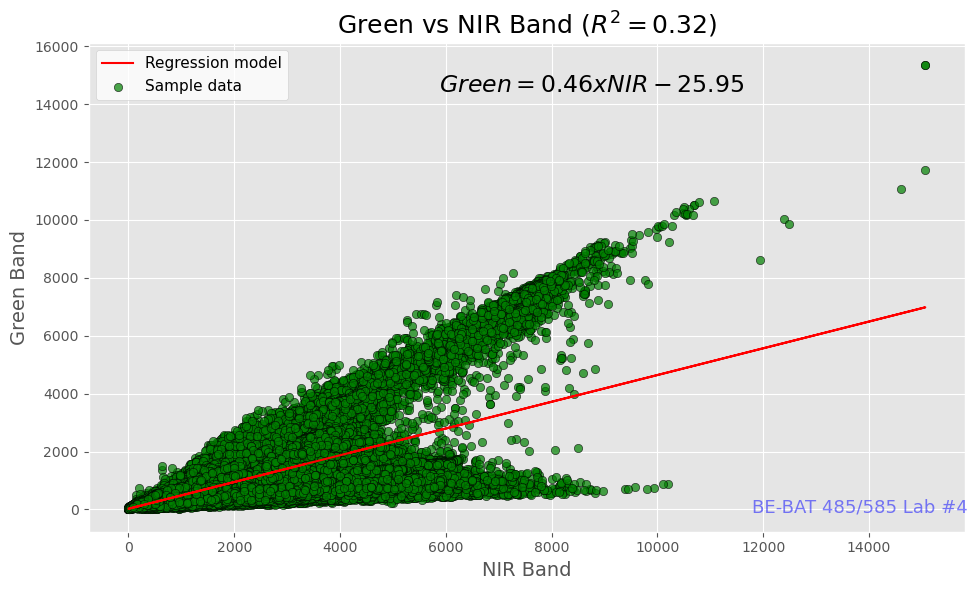

In [94]:
# your code goes heee heee (I'm sorry please don't hate me)

# * Create a scatter plot and a correlation between the GREEN and NIR bands 
X =DataNIR[233:].reshape(-1,1)    # Please understand slicing 
y =DataGreen[233:].reshape(-1,1)  # Please understand slicing 
# Train and generate the model 
model = ols.fit(X,y)
response = model.predict(X)

###################### Evaluate ###############

R2 = model.score(X, y)

###################### Plot ###################
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 6))

# plot the modled data
ax.plot(X, response, color='r', label='Regression model')

# plot the observations
ax.scatter(X, y, edgecolor='k', facecolor='green', alpha=0.7, label='Sample data')
ax.set_ylabel('Green Band', fontsize=14)
ax.set_xlabel('NIR Band', fontsize=14)

# Now add the model equation to the plot
ax.text(0.4, 0.90, '$Green = %.2f xNIR - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

# This is just extra text and titles
ax.text(0.88, 0.05, 'BE-BAT 485/585 Lab #4', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='blue', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Green vs NIR Band ($R^2= %.2f$)' % R2, fontsize=18)


# This call tighten the plot and removes any padding or space around it. Useful sometimes
fig.tight_layout()


In [129]:
# * Then create/simulate a new GREEN band image using this coerrelation 
# NewGreen = model.predict(X)
# print(NewGreen)
# type(NewGreen)
# NewGreen.shape
# print(DataGreen)
# # ??np.reshape
# NewGreen = np.reshape(NewGreen, (500,500))
print(DataNIR.shape)
print(DataNIR)

blank = np.zeros((500,500))

NewGreen = ((blank + DataNIR)**0.46) - 25.95

print(NewGreen)
print(NewGreen.shape)

(500, 500)
[[4625 4271 4117 ... 3422 2704 2691]
 [3994 3653 4039 ... 3461 2615 2598]
 [4242 4200 4172 ... 2250 2530 3287]
 ...
 [3211 4642 3045 ... 2026 2712 4317]
 [3911 4017 3076 ... 3213 4026 4327]
 [3889 3758 3800 ... 2734 2679 3335]]
[[22.57341956 20.82821039 20.04463733 ... 16.29436656 11.95731954
  11.87337695]
 [19.40735364 17.5830253  19.64171955 ... 16.51515716 11.37819403
  11.26636972]
 [20.68183499 20.46888171 20.32627336 ...  8.88404899 10.8150736
  15.5194107 ]
 ...
 [15.07556214 22.65538222 14.0859517  ...  7.24358369 12.00886823
  21.05929546]
 [18.9713082  19.5273178  14.27293085 ... 15.08731461 19.57415931
  21.10935515]
 [18.85489396 18.15421706 18.38027796 ... 12.1502052  11.79569691
  15.79688596]]
(500, 500)


Creating RGB Image...


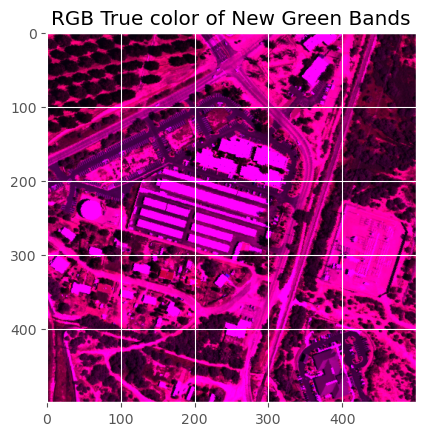

In [135]:
# * Create a true color image with this fake/simulated band to replace the real green band (so instead of RGB you will  use R-Simulated Green-Blue
print("Creating RGB Image...")

# The number 6000 corresponnds to the MAX value for the data, so everything will be scaled to MAX from 8000 and up 
RGBImage=vip.Image_getRGB(DataRed,NewGreen,DataBlue,5000)

# Display RGB True color Image
plt.figure()
plt.title('RGB True color of New Green Bands')
plt.imshow(RGBImage)

In [ ]:
# * Now Create a spectral signature plots for the following pixels/locations (you pick)
#  ** A Vegetated pixel, Asphalt, Soil, Roof, Water,  road, (you will need to identify the Row x Column location)
#  ** Add identifying labels to yoru plots

Going to plot the spectral signature of soil
It looks like the row is 100 and the column is 450


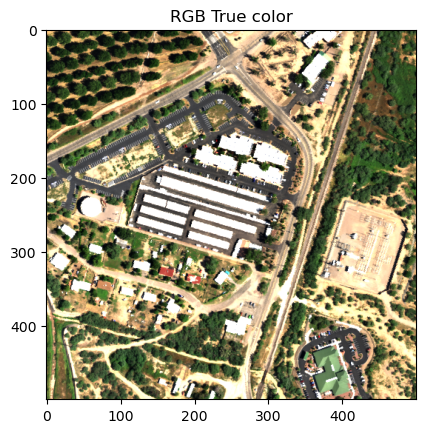

In [143]:
DataAll.shape
print("Going to plot the spectral signature of soil")

# The number 6000 corresponnds to the MAX value for the data, so everything will be scaled to MAX from 8000 and up 
RGBImage=vip.Image_getRGB(DataRed,DataGreen,DataBlue,5000)

# Display RGB True color Image
plt.figure()
plt.title('RGB True color')
plt.imshow(RGBImage)
print("It looks like the row is 100 and the column is 450")



In [140]:
# Define the location and extract their signatures 
Yvalues_soil=DataAll[100,450,:]

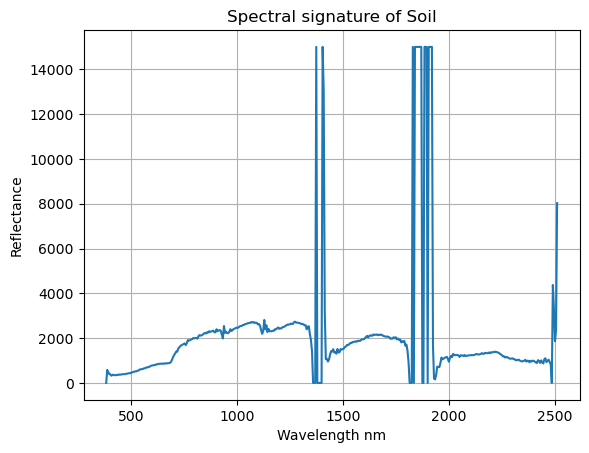

In [141]:
plt.style.use('default')
plt.figure()
plt.title('Spectral signature of Soil')
plt.xlabel('Wavelength nm')
plt.ylabel('Reflectance')
plt.plot(Xvalues,Yvalues_soil)
plt.grid(True)
plt.show()

In [142]:
#display a message to know the program ended
print("program ended.")

program ended.
